In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [353]:
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')

test_df_ID = test_df['ID']

In [295]:
train_df.head()

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,7,Repeat Loan,120.85,0.014305,121.0,0
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,7,Repeat Loan,7768.50,0.300000,7794.0,0
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,7,Repeat Loan,1380.00,0.200000,1428.0,0
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,7,Repeat Loan,2687.40,0.300000,2770.0,0
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,7,Repeat Loan,1369.20,0.300000,1418.0,0


In [296]:
test_df.head()

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid
0,ID_269404226088267278,269404,Kenya,226088,267278,Type_1,1919.0,1989.0,2022-07-27,2022-08-03,7,Repeat Loan,575.7,0.300000,597.0
1,ID_255356300042267278,255356,Kenya,300042,267278,Type_1,2138.0,2153.0,2022-11-16,2022-11-23,7,Repeat Loan,0.0,0.000000,0.0
2,ID_257026243764267278,257026,Kenya,243764,267278,Type_1,8254.0,8304.0,2022-08-24,2022-08-31,7,Repeat Loan,207.0,0.025079,208.0
3,ID_264617299409267278,264617,Kenya,299409,267278,Type_1,3379.0,3379.0,2022-11-15,2022-11-22,7,Repeat Loan,1013.7,0.300000,1014.0
4,ID_247613296713267278,247613,Kenya,296713,267278,Type_1,120.0,120.0,2022-11-10,2022-11-17,7,Repeat Loan,36.0,0.300000,36.0


In [297]:
train_df.describe()

,customer_id,tbl_loan_id,lender_id,Total_Amount,Total_Amount_to_Repay,duration,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
count,68654.000000,68654.000000,68654.000000,6.865400e+04,6.865400e+04,68654.000000,6.865400e+04,68654.000000,6.865400e+04,68654.000000
mean,254390.256780,263056.266248,266420.528462,1.483683e+04,1.563993e+04,8.544586,2.545663e+03,0.218679,2.652621e+03,0.018324
std,26642.719918,39486.661487,3590.999004,1.416499e+05,1.650784e+05,13.343145,1.192272e+04,0.129832,1.338006e+04,0.134120
min,145.000000,101323.000000,245684.000000,2.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,248945.750000,233942.250000,267278.000000,2.295000e+03,2.329000e+03,7.000000,2.340000e+02,0.118712,2.390000e+02,0.000000
50%,255361.000000,260305.500000,267278.000000,5.249000e+03,5.325000e+03,7.000000,9.150000e+02,0.300000,9.340000e+02,0.000000
75%,262269.250000,286962.750000,267278.000000,1.145000e+04,1.165000e+04,7.000000,2.272650e+03,0.300000,2.317000e+03,0.000000
max,312737.000000,375320.000000,267278.000000,2.300000e+07,2.541500e+07,1096.000000,1.600000e+06,1.168119,1.821338e+06,1.000000


It is fair to assume that some columns do not provide much insight about the profile of each customer. Columns like ID, customer_id, country_id, tbl_loan_id, lender_id are either unique to the row or not representative of the test dataset. 

Regarding lender_id, on the test set, we have got a total of 8 lenders, much higher than the 4 on the train set. This means that, for the (at least) 4 that we haven't come across on the train set, we can't deduce much. This kinda hinders generalization and inclines me to omit this column and instead focus on more generalizable features (like the loan amount and duration) for the predictions.

One more column that might not be useful is Amount_Funded_By_Lender, which corresponds to the amount of the deposit covered by the customer. Lender_portion_Funded instead is the percentage of it and this might be more comprehensible for the prediction models.

Another thing to notice is that most loans are very short term (7 days). This might give rise to the importance of the time of the year a loan was cashed out. This can be tracked using the month in disbursement_date. Also, we can get rid of due_date, as this is covered by disbursement_date and duration.

Lender_portion_to_be_repaid keeps track of the repayment progress on the loan. Like Lender_portion_Funded, keeping it as a percentage might make more sense for better results.

Regarding categorical values (which includes the month of the cash out date), we can use one-hot-encoding. About numerical values, we can use an appropriate method to rescale them. Notice how there are quite some outliers on the data, we need to take care of those.

In [354]:
retained_cols = [ 'loan_type', 'Total_Amount', 'Total_Amount_to_Repay', 'disbursement_date', 'duration', 'New_versus_Repeat', 'Amount_Funded_By_Lender', 'Lender_portion_Funded', 'Lender_portion_to_be_repaid']


In [355]:
train_df = train_df[retained_cols + ['target']]
test_df = test_df[retained_cols]

In [356]:
train_df.describe()

,Total_Amount,Total_Amount_to_Repay,duration,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
count,6.865400e+04,6.865400e+04,68654.000000,6.865400e+04,68654.000000,6.865400e+04,68654.000000
mean,1.483683e+04,1.563993e+04,8.544586,2.545663e+03,0.218679,2.652621e+03,0.018324
std,1.416499e+05,1.650784e+05,13.343145,1.192272e+04,0.129832,1.338006e+04,0.134120
min,2.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,2.295000e+03,2.329000e+03,7.000000,2.340000e+02,0.118712,2.390000e+02,0.000000
50%,5.249000e+03,5.325000e+03,7.000000,9.150000e+02,0.300000,9.340000e+02,0.000000
75%,1.145000e+04,1.165000e+04,7.000000,2.272650e+03,0.300000,2.317000e+03,0.000000
max,2.300000e+07,2.541500e+07,1096.000000,1.600000e+06,1.168119,1.821338e+06,1.000000


I am replacing `Total_Amount_to_Repay`, `Lender_portion_to_be_repaid` to allow for easier extraction of information:

In [357]:
def replace_vals(train_df):
    train_df['Total_Amount_to_Repay_perc'] = train_df['Total_Amount_to_Repay'] / train_df['Total_Amount']
    train_df['Lender_portion_to_be_repaid_perc'] = train_df['Lender_portion_to_be_repaid'] / train_df['Amount_Funded_By_Lender']
    train_df['disbursement_month'] = train_df['disbursement_date'].apply(lambda x: (int(x.split('-')[1]) - 1) / 11)
    


In [358]:
replace_vals(train_df)
replace_vals(test_df)

In [359]:
train_df = train_df.drop([ 'Total_Amount_to_Repay', 'Lender_portion_to_be_repaid', 'Amount_Funded_By_Lender' ], axis=1)
test_df = test_df.drop([ 'Total_Amount_to_Repay', 'Lender_portion_to_be_repaid', 'Amount_Funded_By_Lender' ], axis=1)

In [360]:
test_df.head()

,loan_type,Total_Amount,disbursement_date,duration,New_versus_Repeat,Lender_portion_Funded,Total_Amount_to_Repay_perc,Lender_portion_to_be_repaid_perc,disbursement_month
0,Type_1,1919.0,2022-07-27,7,Repeat Loan,0.300000,1.036477,1.036998,0.545455
1,Type_1,2138.0,2022-11-16,7,Repeat Loan,0.000000,1.007016,NaN,0.909091
2,Type_1,8254.0,2022-08-24,7,Repeat Loan,0.025079,1.006058,1.004831,0.636364
3,Type_1,3379.0,2022-11-15,7,Repeat Loan,0.300000,1.000000,1.000296,0.909091
4,Type_1,120.0,2022-11-10,7,Repeat Loan,0.300000,1.000000,1.000000,0.909091


Now I am doing some more analysis and plotting on the remaining categorical and numerical values. We have got 2 categoriacal values: `loan_type` and `New_versus_Repeat`. I will analyze those first and use One-Hot-Encoding:

In [361]:
print(train_df['New_versus_Repeat'].value_counts())
print(test_df['New_versus_Repeat'].value_counts())

New_versus_Repeat
Repeat Loan    68087
New Loan         567
Name: count, dtype: int64
New_versus_Repeat
Repeat Loan    18425
New Loan         169
Name: count, dtype: int64


Most of the loans in the dataset are about repeat loans.

In [362]:
print(train_df['loan_type'].value_counts())
print(test_df['loan_type'].value_counts())

loan_type
Type_1     61723
Type_7      2790
Type_5      1521
Type_4      1235
Type_10      466
Type_6       357
Type_9       205
Type_14       99
Type_2        74
Type_11       42
Type_18       30
Type_17       23
Type_12       21
Type_23       18
Type_20       13
Type_16       12
Type_13       10
Type_19        4
Type_15        4
Type_21        3
Type_24        3
Type_22        1
Name: count, dtype: int64
loan_type
Type_1     13618
Type_3      3039
Type_7       592
Type_2       454
Type_5       298
Type_4       253
Type_6        98
Type_10       96
Type_9        42
Type_8        37
Type_14       17
Type_11       14
Type_18       12
Type_23        6
Type_12        5
Type_24        4
Type_17        3
Type_13        2
Type_22        1
Type_20        1
Type_15        1
Type_21        1
Name: count, dtype: int64


We don't have any loans of type 3 on the train set and we should handle this with care. We can designate it as "unknown" on the test set.

In [363]:
train_df = pd.get_dummies(train_df, columns=['loan_type'])
test_dummies = pd.get_dummies(test_df, columns=['loan_type'])

# Align test DataFrame to match training columns
test_df = test_dummies.reindex(columns=train_dummies.columns, fill_value=0)

In [364]:
test_df.drop(['target'], axis=1, inplace=True)

In [365]:
train_df = pd.get_dummies(train_df, columns=['New_versus_Repeat'])
test_df = pd.get_dummies(test_df, columns=['New_versus_Repeat'])

In [366]:
train_df.drop(['disbursement_date'], axis=1, inplace=True)
test_df.drop(['disbursement_date'], axis=1, inplace=True)

In [367]:
test_df

,Total_Amount,duration,Lender_portion_Funded,Total_Amount_to_Repay_perc,Lender_portion_to_be_repaid_perc,disbursement_month,loan_type_Type_1,loan_type_Type_10,loan_type_Type_11,loan_type_Type_12,...,loan_type_Type_22,loan_type_Type_23,loan_type_Type_24,loan_type_Type_4,loan_type_Type_5,loan_type_Type_6,loan_type_Type_7,loan_type_Type_9,New_versus_Repeat_New Loan,New_versus_Repeat_Repeat Loan
0,1919.00,7,0.300000,1.036477,1.036998,0.545455,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2138.00,7,0.000000,1.007016,NaN,0.909091,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,8254.00,7,0.025079,1.006058,1.004831,0.636364,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,3379.00,7,0.300000,1.000000,1.000296,0.909091,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,120.00,7,0.300000,1.000000,1.000000,0.909091,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18589,1730.41,7,0.155689,1.029999,1.038454,0.090909,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
18590,1534.00,7,0.300000,1.000000,0.999565,0.636364,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
18591,1372.21,7,0.130208,1.029944,1.000000,0.454545,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
18592,5608.00,7,0.000000,1.030849,NaN,0.636364,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [368]:
train_df.describe()

,Total_Amount,duration,Lender_portion_Funded,target,Total_Amount_to_Repay_perc,Lender_portion_to_be_repaid_perc,disbursement_month
count,6.865400e+04,68654.000000,68654.000000,68654.000000,68654.000000,60134.000000,68654.000000
mean,1.483683e+04,8.544586,0.218679,0.018324,1.021674,1.017492,0.707502
std,1.416499e+05,13.343145,0.129832,0.134120,0.055723,0.103287,0.148277
min,2.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.295000e+03,7.000000,0.118712,0.000000,1.000000,1.000189,0.636364
50%,5.249000e+03,7.000000,0.300000,0.000000,1.008157,1.010081,0.727273
75%,1.145000e+04,7.000000,0.300000,0.000000,1.030409,1.030513,0.818182
max,2.300000e+07,1096.000000,1.168119,1.000000,3.164865,3.162162,1.000000


We see great variation in the amount and duration columns. Let me create histograms (in the logarithmic scale):

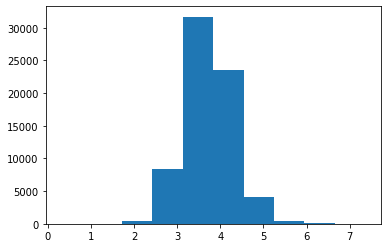

In [369]:
plt.hist(np.log10(train_df['Total_Amount'] ))
plt.show()

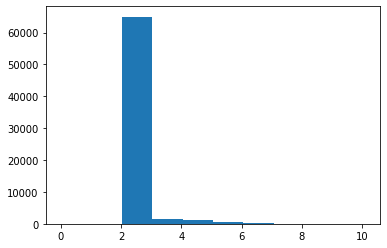

In [269]:
plt.hist(np.log2(train_df['duration'] ))
plt.show()

In [370]:
print(len(train_df[train_df['duration'] == 7]) / len(train_df))
print(len(test_df[test_df['duration'] == 7]) / len(test_df))

0.9463833134267486
0.9339034097020544


Notice that over 90% of the loans are for 7 days and that the loan amounts range from values close to 10 up to $10^7$. For the amounts, it makes sense to work on logarithmic scale and for duration to split it to small (<=7 days) and large.

In [371]:
train_df['duration_cat'] = train_df['duration'].apply(lambda x: 'small' if x <= 7 else 'big')
test_df['duration_cat'] = test_df['duration'].apply(lambda x: 'small' if x <= 7 else 'big')

In [372]:
train_df['amount_log'] = np.log10(train_df['Total_Amount'])
test_df['amount_log'] = np.log10(test_df['Total_Amount'])

In [373]:
train_df = pd.get_dummies(train_df, columns=['duration_cat'])
test_df = pd.get_dummies(test_df, columns=['duration_cat'])

In [374]:
train_df.drop(['Total_Amount', 'duration'], axis=1, inplace=True)
test_df.drop(['Total_Amount', 'duration'], axis=1, inplace=True)

In [375]:
train_df

,Lender_portion_Funded,target,Total_Amount_to_Repay_perc,Lender_portion_to_be_repaid_perc,disbursement_month,loan_type_Type_1,loan_type_Type_10,loan_type_Type_11,loan_type_Type_12,loan_type_Type_13,...,loan_type_Type_4,loan_type_Type_5,loan_type_Type_6,loan_type_Type_7,loan_type_Type_9,New_versus_Repeat_New Loan,New_versus_Repeat_Repeat Loan,amount_log,duration_cat_big,duration_cat_small
0,0.014305,0,1.000000,1.001241,0.636364,True,False,False,False,False,...,False,False,False,False,False,False,True,3.926754,False,True
1,0.300000,0,1.003244,1.003282,0.545455,True,False,False,False,False,...,False,False,False,False,False,False,True,4.413216,False,True
2,0.200000,0,1.035072,1.034783,0.727273,False,False,False,False,False,...,False,False,False,True,False,False,True,3.838849,False,True
3,0.300000,0,1.030699,1.030736,0.818182,True,False,False,False,False,...,False,False,False,False,False,False,True,3.952211,False,True
4,0.300000,0,1.035933,1.035641,0.909091,True,False,False,False,False,...,False,False,False,False,False,False,True,3.659346,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68649,0.300000,0,1.037671,1.038813,0.545455,True,False,False,False,False,...,False,False,False,False,False,False,True,3.164353,False,True
68650,0.300000,0,1.017300,1.017432,0.545455,True,False,False,False,False,...,False,False,False,False,False,False,True,3.701482,False,True
68651,0.300000,0,1.000000,1.000189,0.545455,True,False,False,False,False,...,False,False,False,False,False,False,True,3.723374,False,True
68652,0.222283,0,1.000000,0.999879,0.909091,True,False,False,False,False,...,False,False,False,False,False,False,True,3.522966,False,True


In [376]:
train_df = train_df.fillna(0.0)
test_df = test_df.fillna(0.0)

In [377]:
X_train, y_train = train_df.drop(['target'], axis=1), train_df['target']
X_test = test_df

X_test.head()

,Lender_portion_Funded,Total_Amount_to_Repay_perc,Lender_portion_to_be_repaid_perc,disbursement_month,loan_type_Type_1,loan_type_Type_10,loan_type_Type_11,loan_type_Type_12,loan_type_Type_13,loan_type_Type_14,...,loan_type_Type_4,loan_type_Type_5,loan_type_Type_6,loan_type_Type_7,loan_type_Type_9,New_versus_Repeat_New Loan,New_versus_Repeat_Repeat Loan,amount_log,duration_cat_big,duration_cat_small
0,0.300000,1.036477,1.036998,0.545455,True,False,False,False,False,False,...,False,False,False,False,False,False,True,3.283075,False,True
1,0.000000,1.007016,0.000000,0.909091,True,False,False,False,False,False,...,False,False,False,False,False,False,True,3.330008,False,True
2,0.025079,1.006058,1.004831,0.636364,True,False,False,False,False,False,...,False,False,False,False,False,False,True,3.916664,False,True
3,0.300000,1.000000,1.000296,0.909091,True,False,False,False,False,False,...,False,False,False,False,False,False,True,3.528788,False,True
4,0.300000,1.000000,1.000000,0.909091,True,False,False,False,False,False,...,False,False,False,False,False,False,True,2.079181,False,True


In [391]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2, shuffle=True, random_state=100, stratify=y_train)

In [392]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [393]:
from sklearn.metrics import f1_score

y_pred = lr.predict(X_val)
print(f1_score(y_pred, y_val))

0.7062499999999999


In [401]:
y_pred_test = lr.predict(X_test)
res = test_df_ID.to_frame().join(pd.Series(y_pred_test, name='target'))
res.to_csv('submission_lr.csv', index=False)

res

,ID,target
0,ID_269404226088267278,0
1,ID_255356300042267278,0
2,ID_257026243764267278,0
3,ID_264617299409267278,0
4,ID_247613296713267278,0
...,...,...
18589,ID_297596365331297183,0
18590,ID_259715231897267278,0
18591,ID_296701364008297183,0
18592,ID_268271242864267278,0


In [400]:
print(test_df_ID)

0        ID_269404226088267278
1        ID_255356300042267278
2        ID_257026243764267278
3        ID_264617299409267278
4        ID_247613296713267278
                 ...          
18589    ID_297596365331297183
18590    ID_259715231897267278
18591    ID_296701364008297183
18592    ID_268271242864267278
18593    ID_248929241821267278
Name: ID, Length: 18594, dtype: object


In [409]:
def train_test_local(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    return f1_score(y_pred, y_val)

def submit(model, filename):
    y_pred_test = model.predict(X_test)
    
    res = test_df_ID.to_frame().join(pd.Series(y_pred_test, name='target'))
    res.to_csv(filename, index=False)

In [413]:
from sklearn.ensemble import RandomForestClassifier

for n_estimators in [ 10, 20, 50, 100 ]:
    for criterion in [ 'gini', 'entropy', 'log_loss' ]:
        for max_depth in [ 5, 10, 20, None ]:
            rfc = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, random_state=0)
            
            score = train_test_local(rfc)
            print(f'Score for RBF with n_estimators={n_estimators}, criterion={criterion}, max_depth={max_depth}: {score}')

Score for RBF with n_estimators=10, criterion=gini, max_depth=5: 0.7200000000000001
Score for RBF with n_estimators=10, criterion=gini, max_depth=10: 0.818181818181818
Score for RBF with n_estimators=10, criterion=gini, max_depth=20: 0.870712401055409
Score for RBF with n_estimators=10, criterion=gini, max_depth=None: 0.8802083333333334
Score for RBF with n_estimators=10, criterion=entropy, max_depth=5: 0.792022792022792
Score for RBF with n_estimators=10, criterion=entropy, max_depth=10: 0.8360655737704917
Score for RBF with n_estimators=10, criterion=entropy, max_depth=20: 0.8775510204081632
Score for RBF with n_estimators=10, criterion=entropy, max_depth=None: 0.8682170542635659
Score for RBF with n_estimators=10, criterion=log_loss, max_depth=5: 0.792022792022792
Score for RBF with n_estimators=10, criterion=log_loss, max_depth=10: 0.8360655737704917
Score for RBF with n_estimators=10, criterion=log_loss, max_depth=20: 0.8775510204081632
Score for RBF with n_estimators=10, criterio

In [414]:
from sklearn.ensemble import RandomForestClassifier

for n_estimators in [ 150, 200 ]:
    for criterion in [ 'gini', 'entropy', 'log_loss' ]:
        for max_depth in [ 5, 10, 20, None ]:
            rfc = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, random_state=0)
            
            score = train_test_local(rfc)
            print(f'Score for RBF with n_estimators={n_estimators}, criterion={criterion}, max_depth={max_depth}: {score}')

Score for RBF with n_estimators=150, criterion=gini, max_depth=5: 0.7469879518072289
Score for RBF with n_estimators=150, criterion=gini, max_depth=10: 0.8199445983379502
Score for RBF with n_estimators=150, criterion=gini, max_depth=20: 0.8871794871794872
Score for RBF with n_estimators=150, criterion=gini, max_depth=None: 0.8979591836734694
Score for RBF with n_estimators=150, criterion=entropy, max_depth=5: 0.7917888563049854
Score for RBF with n_estimators=150, criterion=entropy, max_depth=10: 0.8254847645429363
Score for RBF with n_estimators=150, criterion=entropy, max_depth=20: 0.8962025316455695
Score for RBF with n_estimators=150, criterion=entropy, max_depth=None: 0.881443298969072
Score for RBF with n_estimators=150, criterion=log_loss, max_depth=5: 0.7917888563049854
Score for RBF with n_estimators=150, criterion=log_loss, max_depth=10: 0.8254847645429363
Score for RBF with n_estimators=150, criterion=log_loss, max_depth=20: 0.8962025316455695
Score for RBF with n_estimator

KeyboardInterrupt: 

In [419]:
from sklearn.svm import SVC

for gamma in [ 1, .1, .01, .001, .0001, 'auto', 'scale' ]:
    for C in [ .1, 1, 10, 100, 1000]:
        svc = SVC(kernel='rbf', gamma=gamma, C=C )
        score = train_test_local(svc)

        print(f'Score for SVC RBF with gamma={gamma}, C={C}: {score}')        
        
svc = SVC(kernel='rbf')

train_test_local(svc)

Score for SVC RBF with gamma=1, C=0.1: 0.5289855072463768
Score for SVC RBF with gamma=1, C=1: 0.6481481481481481
Score for SVC RBF with gamma=1, C=10: 0.8067226890756303
Score for SVC RBF with gamma=1, C=100: 0.8189415041782729
Score for SVC RBF with gamma=1, C=1000: 0.8251366120218581
Score for SVC RBF with gamma=0.1, C=0.1: 0.4341085271317829
Score for SVC RBF with gamma=0.1, C=1: 0.6561514195583596
Score for SVC RBF with gamma=0.1, C=10: 0.688622754491018
Score for SVC RBF with gamma=0.1, C=100: 0.8121546961325966
Score for SVC RBF with gamma=0.1, C=1000: 0.8199445983379502
Score for SVC RBF with gamma=0.01, C=0.1: 0.0
Score for SVC RBF with gamma=0.01, C=1: 0.4794007490636704
Score for SVC RBF with gamma=0.01, C=10: 0.6624203821656051
Score for SVC RBF with gamma=0.01, C=100: 0.6869300911854104
Score for SVC RBF with gamma=0.01, C=1000: 0.7564469914040116
Score for SVC RBF with gamma=0.001, C=0.1: 0.0


KeyboardInterrupt: 

In [420]:
for gamma in [ .1, .01, .001, .0001, 'auto', 'scale' ]:
    for C in [ 10, 100, 1000, 1e3, 1e4, 1e5 ]:
        svc = SVC(kernel='rbf', gamma=gamma, C=C )
        score = train_test_local(svc)

        print(f'Score for SVC RBF with gamma={gamma}, C={C}: {score}')        
        
svc = SVC(kernel='rbf')

train_test_local(svc)

Score for SVC RBF with gamma=0.1, C=10: 0.688622754491018
Score for SVC RBF with gamma=0.1, C=100: 0.8121546961325966
Score for SVC RBF with gamma=0.1, C=1000: 0.8199445983379502
Score for SVC RBF with gamma=0.1, C=1000.0: 0.8199445983379502
Score for SVC RBF with gamma=0.1, C=10000.0: 0.821529745042493
Score for SVC RBF with gamma=0.1, C=100000.0: 0.8209366391184573
Score for SVC RBF with gamma=0.01, C=10: 0.6624203821656051
Score for SVC RBF with gamma=0.01, C=100: 0.6869300911854104
Score for SVC RBF with gamma=0.01, C=1000: 0.7564469914040116
Score for SVC RBF with gamma=0.01, C=1000.0: 0.7564469914040116
Score for SVC RBF with gamma=0.01, C=10000.0: 0.8088642659279778
Score for SVC RBF with gamma=0.01, C=100000.0: 0.8189415041782729
Score for SVC RBF with gamma=0.001, C=10: 0.48507462686567165
Score for SVC RBF with gamma=0.001, C=100: 0.6518987341772152
Score for SVC RBF with gamma=0.001, C=1000: 0.691131498470948
Score for SVC RBF with gamma=0.001, C=1000.0: 0.691131498470948
Sc

0.65814696485623

In [415]:
from sklearn.ensemble import RandomForestClassifier

for n_estimators in [ 300 ]:
        for max_depth in [ 5, 10, 20, 50, None ]:
            rfc = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=0)
            
            score = train_test_local(rfc)
            print(f'Score for RBF with n_estimators={n_estimators}, max_depth={max_depth}: {score}')

Score for RBF with n_estimators=300, max_depth=5: 0.7333333333333335
Score for RBF with n_estimators=300, max_depth=10: 0.8222222222222223
Score for RBF with n_estimators=300, max_depth=20: 0.8951406649616369
Score for RBF with n_estimators=300, max_depth=50: 0.8928571428571429
Score for RBF with n_estimators=300, max_depth=None: 0.8928571428571429


In [412]:
rfc = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=20, random_state=0)
train_test_local(rfc)

0.8911392405063292

In [406]:
submit(rfc, 'submission_rf.csv')

In [425]:
svc = SVC(kernel='rbf', gamma='auto', C=10000)
print(train_test_local(svc))
submit(svc, 'submission_svc.csv')

0.8268156424581005


In [442]:
import xgboost as xgb
from xgboost import XGBClassifier

dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

In [461]:
for n_estimators in [ 10, 20, 50, 100 ]:
    for max_depth in [ 5, 10, 20, 50 ]:
        for learning_rate in [ 0.3, 0.5, 0.8 ]:
            params = {
                'n_estimators': n_estimators,
                'max_depth': max_depth,
                'learning_rate': learning_rate,
                'eval_metric': 'logloss'
            }
            
            bst = XGBClassifier(**params)
            
            score = train_test_local(bst)
            print(f'Score for XGB with n_estimators={n_estimators}, max_depth={max_depth}, learning_rate={learning_rate}: {score}')


Score for XGB with n_estimators=10, max_depth=5, learning_rate=0.3: 0.8176795580110497
Score for XGB with n_estimators=10, max_depth=5, learning_rate=0.5: 0.8288770053475937
Score for XGB with n_estimators=10, max_depth=5, learning_rate=0.8: 0.8421052631578948
Score for XGB with n_estimators=10, max_depth=10, learning_rate=0.3: 0.8661417322834646
Score for XGB with n_estimators=10, max_depth=10, learning_rate=0.5: 0.8556962025316456
Score for XGB with n_estimators=10, max_depth=10, learning_rate=0.8: 0.8578680203045687
Score for XGB with n_estimators=10, max_depth=20, learning_rate=0.3: 0.8593750000000001
Score for XGB with n_estimators=10, max_depth=20, learning_rate=0.5: 0.8636363636363636
Score for XGB with n_estimators=10, max_depth=20, learning_rate=0.8: 0.8614609571788413
Score for XGB with n_estimators=10, max_depth=50, learning_rate=0.3: 0.8593750000000001
Score for XGB with n_estimators=10, max_depth=50, learning_rate=0.5: 0.8636363636363636
Score for XGB with n_estimators=10,

In [463]:
xgb = XGBClassifier(n_estimators=100, max_depth=20, learning_rate=0.5, eval_metric='logloss')
print(train_test_local(xgb))
submit(xgb, 'submission_xgb.csv')

0.8762376237623762
